In [1]:
import numpy as np

data_ann = np.load('/home/newuser/Downloads/data_Fusi/training_Elisa1_2s_22_11_ann.npy')
data_emg = np.load('/home/newuser/Downloads/data_Fusi/training_Elisa1_2s_22_11_emg.npy')

print('ann:', data_ann.shape, '\n', data_ann)
print('emg:', data_emg.shape, '\n', data_emg)

ann: (8990,) 
 [b'rock' b'rock' b'rock' ... b'none' b'none' b'none']
emg: (8990, 8) 
 [[ -2  -3 -11 ...  -9 -15   2]
 [-16  -5 -13 ... -10  20   2]
 [ -8  -4  -1 ...  11   4  -7]
 ...
 [  0   0   0 ...  -3   0  -2]
 [  0   1  -1 ...  -1  -2   0]
 [  0  -2  -3 ...  -2   0  -3]]


In [2]:
from collections import Counter
result = Counter(data_ann)
print(result)

Counter({b'none': 2993, b'paper': 2000, b'scissor': 2000, b'rock': 1997})


In [3]:
tw = np.linspace(1, 1000, len(data_ann))

<IPython.core.display.Javascript object>


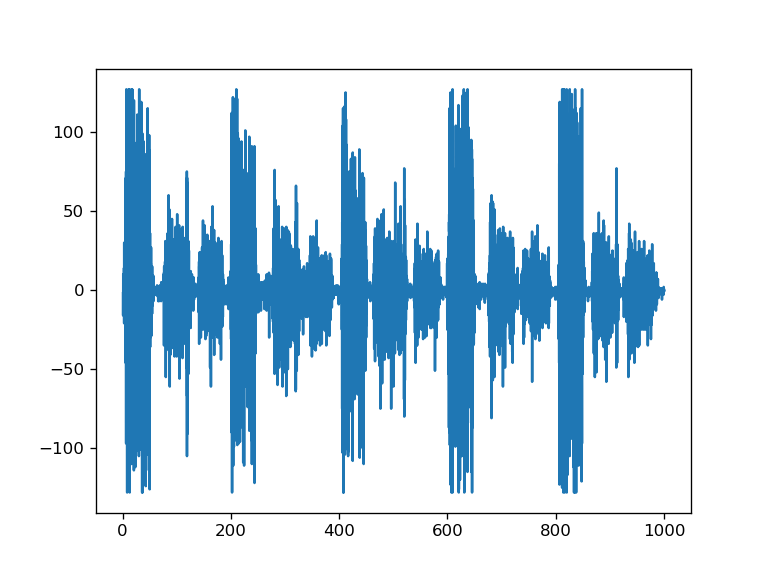

<IPython.core.display.Javascript object>


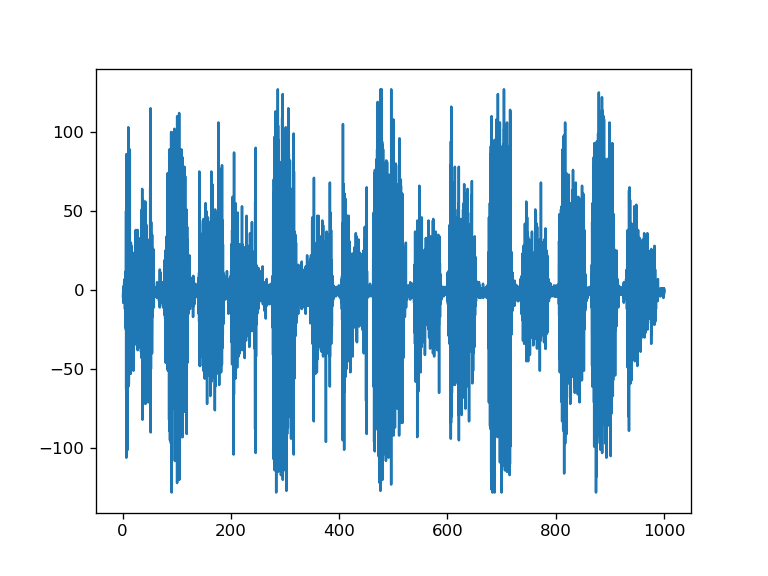

<IPython.core.display.Javascript object>


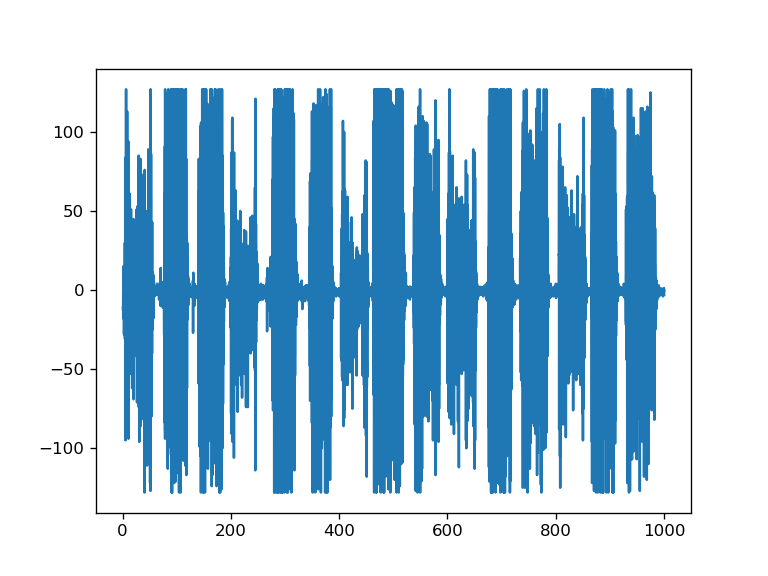

<IPython.core.display.Javascript object>


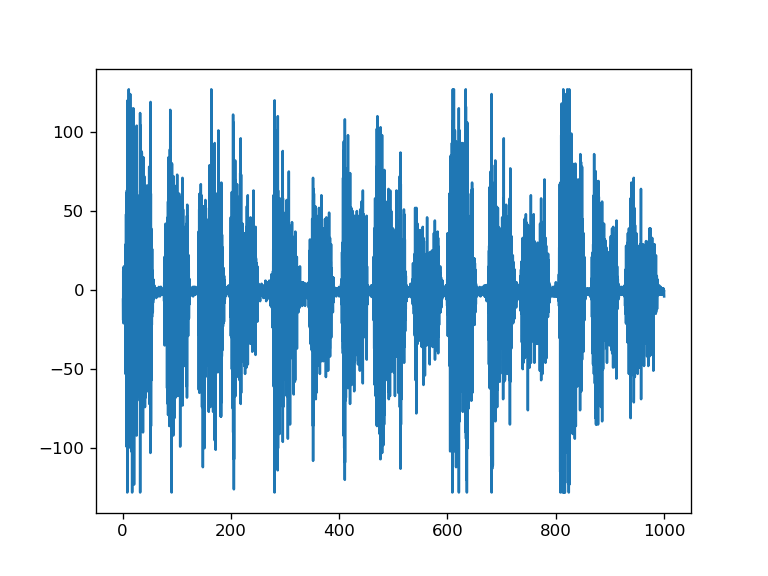

<IPython.core.display.Javascript object>


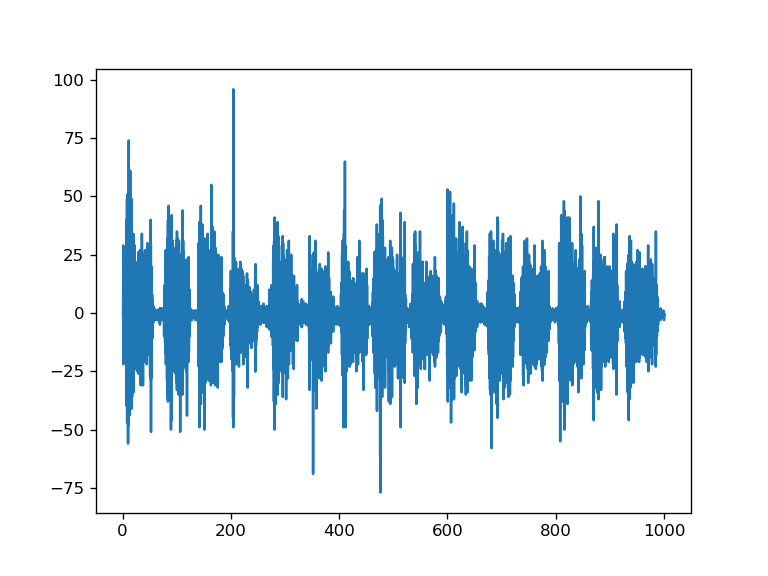

<IPython.core.display.Javascript object>


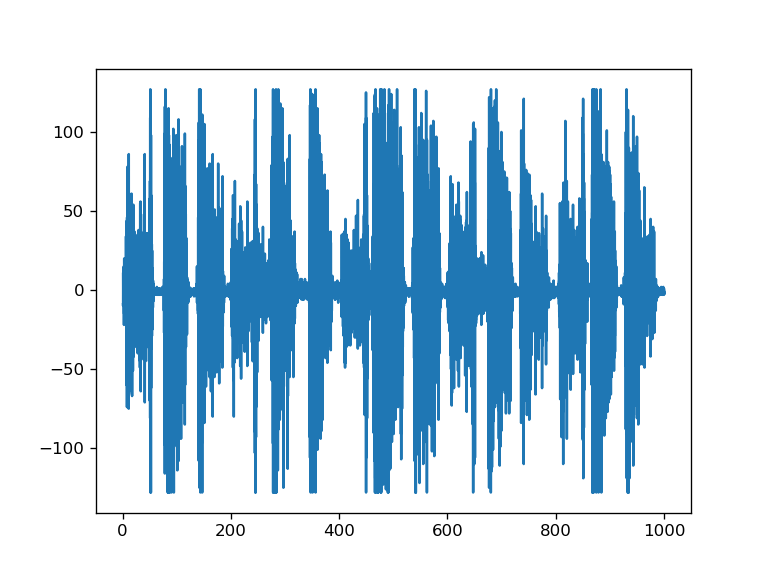

<IPython.core.display.Javascript object>


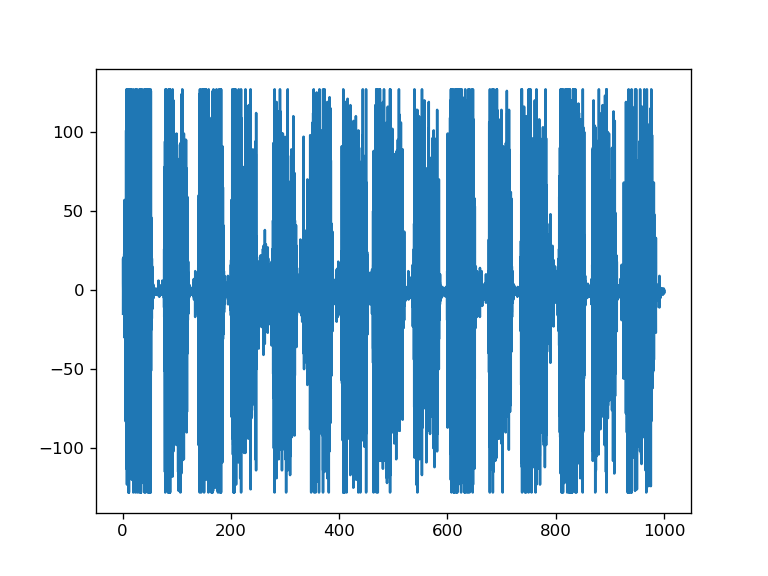

<IPython.core.display.Javascript object>


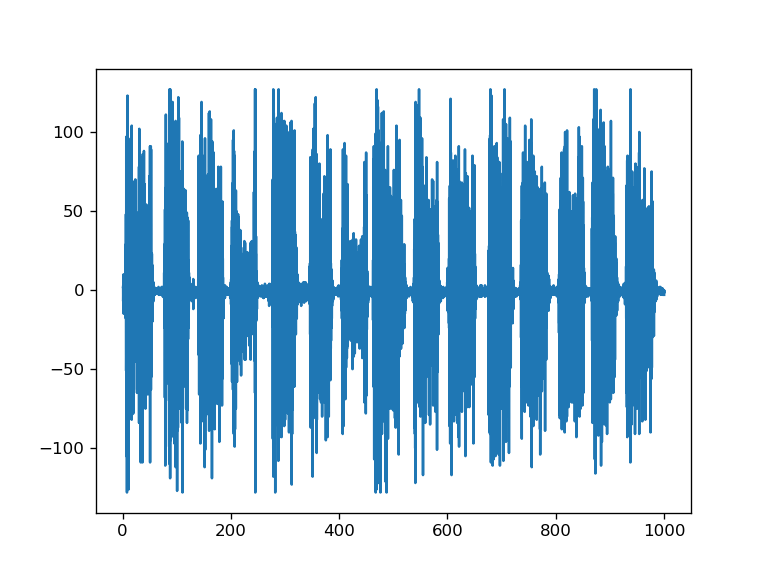

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

for channel in range(np.size(data_emg, axis = 1)):
    plt.figure()
    plt.plot(tw, data_emg[:, channel])
    plt.show()

<IPython.core.display.Javascript object>


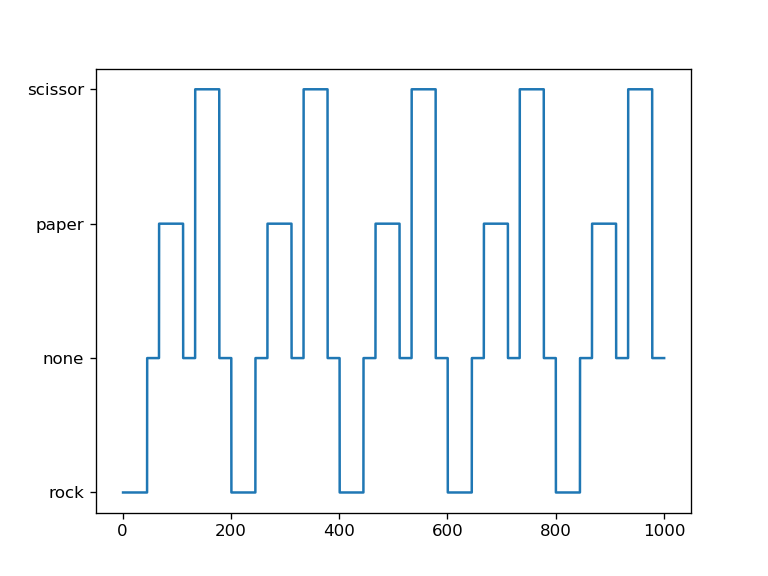

In [5]:
plt.figure()
plt.plot(tw, data_ann)
plt.show()

In [6]:
import numpy

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y

<IPython.core.display.Javascript object>


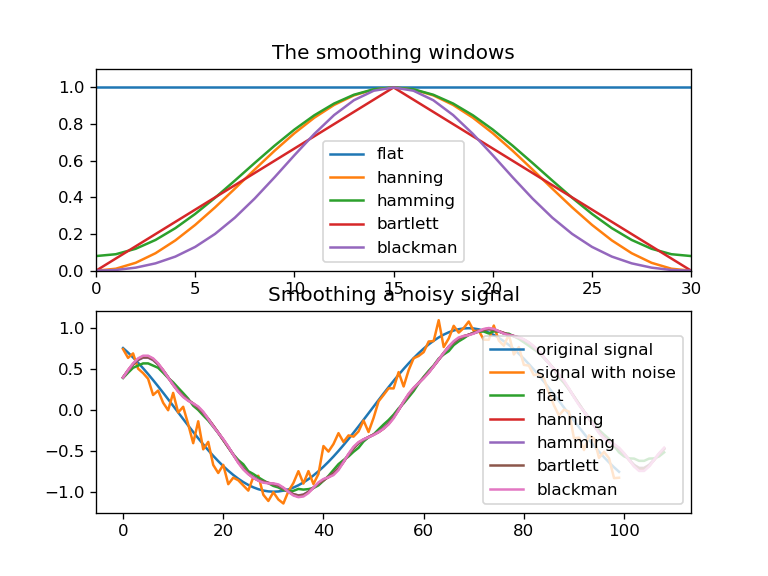

In [7]:
from numpy import *
from pylab import *

def smooth_demo():

    t=linspace(-4,4,100)
    x=sin(t)
    xn=x+randn(len(t))*0.1
    y=smooth(x)

    ws=31

    plt.figure()
    plt.subplot(211)
    plt.plot(ones(ws))

    windows=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']

    for w in windows[1:]:
        eval('plot('+w+'(ws) )')

    plt.axis([0,30,0,1.1])

    plt.legend(windows)
    plt.title("The smoothing windows")
    plt.subplot(212)
    plt.plot(x)
    plt.plot(xn)
    for w in windows:
        plt.plot(smooth(xn,10,w))
    l=['original signal', 'signal with noise']
    l.extend(windows)

    plt.legend(l)
    plt.title("Smoothing a noisy signal")
    plt.show()

if __name__=='__main__':
    smooth_demo()

<IPython.core.display.Javascript object>


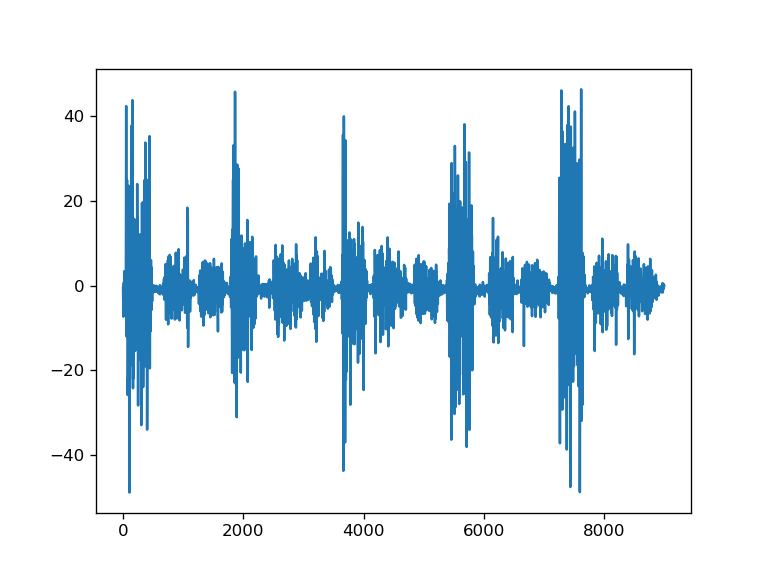

<IPython.core.display.Javascript object>


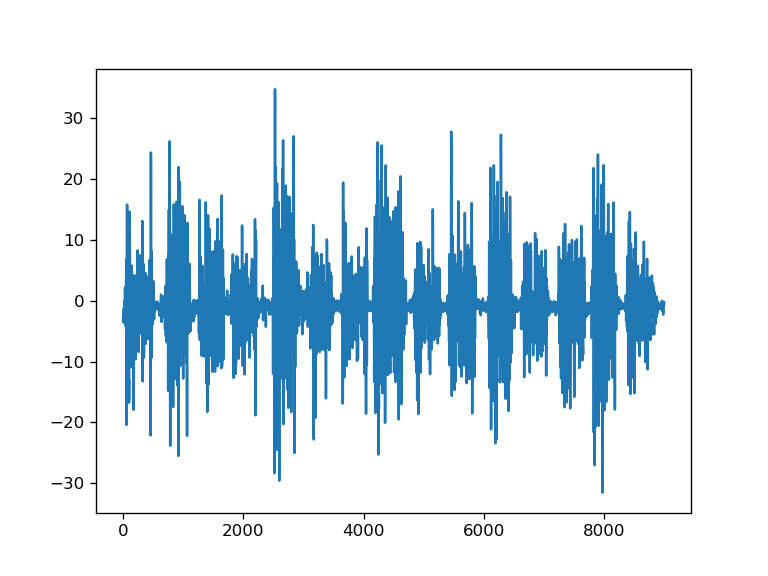

<IPython.core.display.Javascript object>


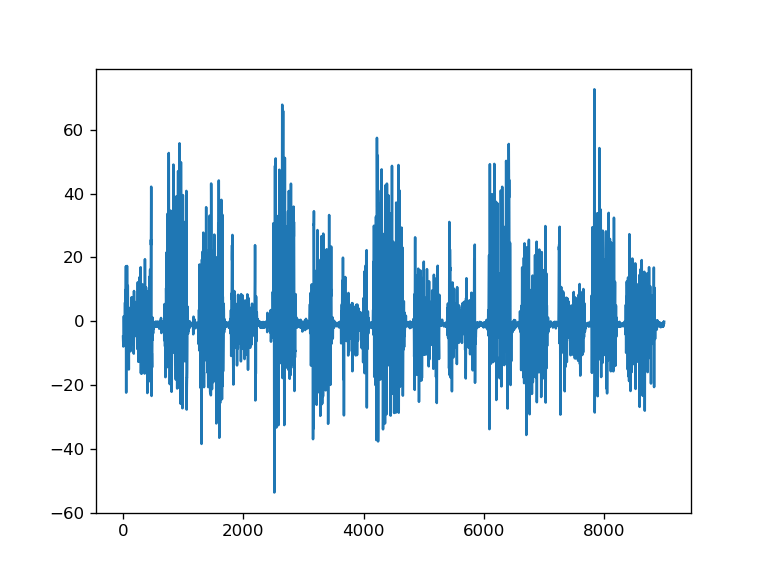

<IPython.core.display.Javascript object>


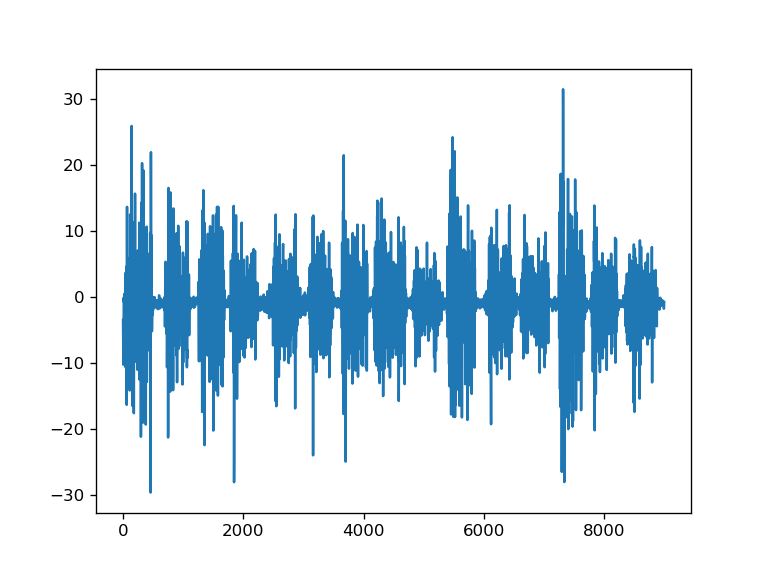

<IPython.core.display.Javascript object>


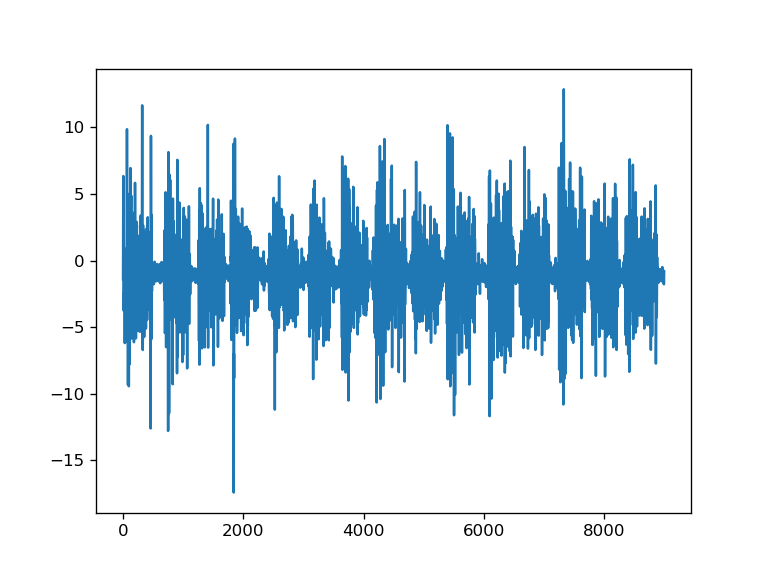

<IPython.core.display.Javascript object>


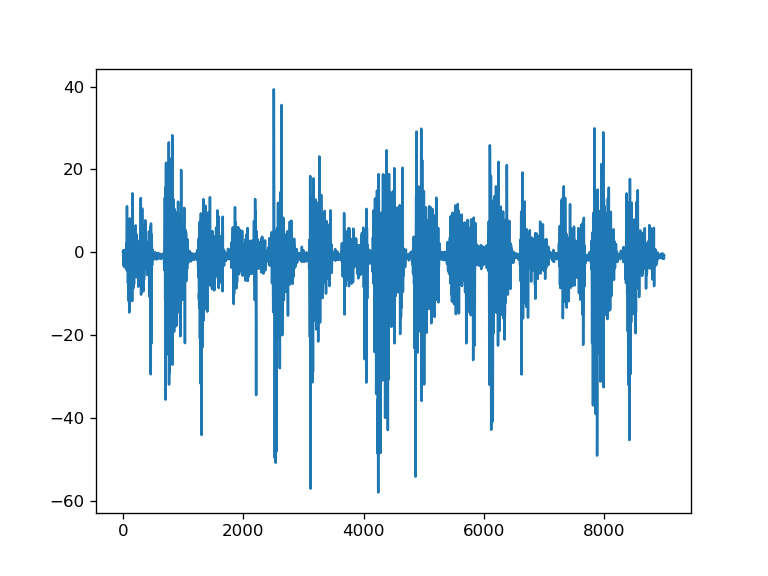

<IPython.core.display.Javascript object>


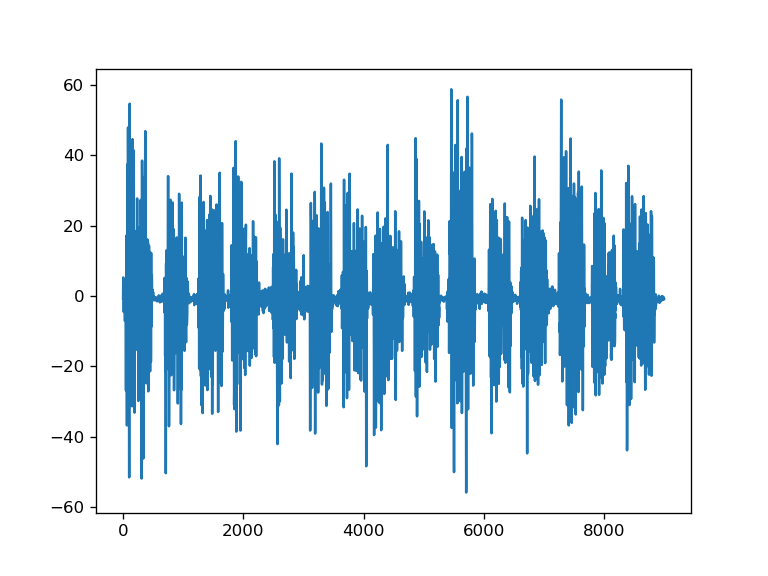

<IPython.core.display.Javascript object>


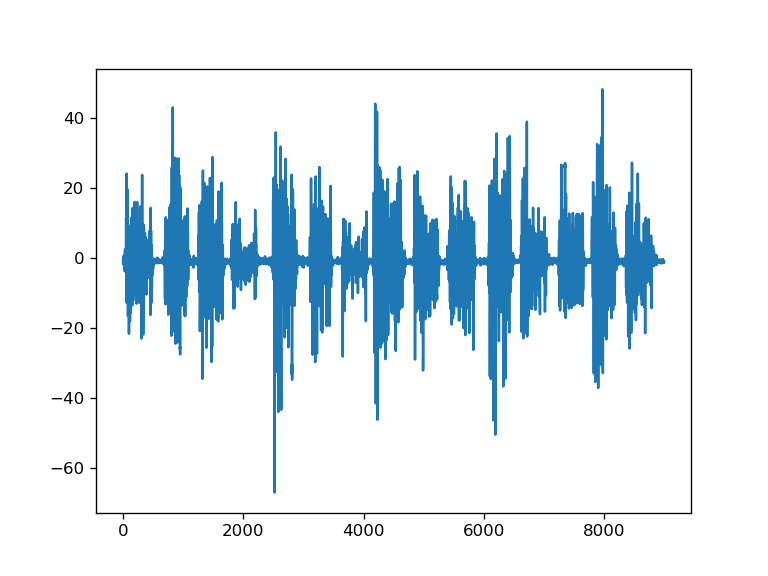

In [8]:
for channel in range(np.size(data_emg, axis = 1)):
    plt.figure()
    data_smooth = smooth(data_emg[:, channel], 10, 'hanning')
    plt.plot(data_smooth)
    plt.show()

In [9]:
for channel in range(np.size(data_emg, axis = 1)):
    print(channel, np.min(data_emg[:, channel]), np.max(data_emg[:, channel]))

0 -128 127
1 -128 127
2 -128 127
3 -128 127
4 -77 96
5 -128 127
6 -128 127
7 -128 127


In [10]:
for channel in range(np.size(data_emg, axis = 1)):
    data_smooth = smooth(data_emg[:, channel], 10, 'hanning')
    print(channel, np.min(data_smooth), np.max(data_smooth))

0 -48.84621880284709 46.32234751631041
1 -31.526262576901 34.785894918694304
2 -53.714291168338164 72.69640269402642
3 -29.674270613064653 31.549160451695506
4 -17.420517959414834 12.869152845342642
5 -57.92513178684106 39.35443347518355
6 -55.884773169217254 58.73748633017426
7 -66.8732859155633 48.21517783831301


In [11]:
print(np.size(np.where(data_emg[:, 0]>=105)))
print(np.size(np.where((data_emg[:, 0]>=90) & (data_emg[:, 0]<105))))
print(np.size(np.where((data_emg[:, 0]>=75) & (data_emg[:, 0]<90))))
print(np.size(np.where((data_emg[:, 0]>=60) & (data_emg[:, 0]<75))))
print(np.size(np.where((data_emg[:, 0]>=45) & (data_emg[:, 0]<60))))
print(np.size(np.where((data_emg[:, 0]>=30) & (data_emg[:, 0]<45))))
print(np.size(np.where((data_emg[:, 0]>=15) & (data_emg[:, 0]<30))))
print(np.size(np.where((data_emg[:, 0]>=0) & (data_emg[:, 0]<15))))
print(np.size(np.where((data_emg[:, 0]>=-15) & (data_emg[:, 0]<0))))
print(np.size(np.where((data_emg[:, 0]>=-30) & (data_emg[:, 0]<-15))))
print(np.size(np.where((data_emg[:, 0]>=-45) & (data_emg[:, 0]<-30))))
print(np.size(np.where((data_emg[:, 0]>=-60) & (data_emg[:, 0]<-45))))
print(np.size(np.where((data_emg[:, 0]>=-75) & (data_emg[:, 0]<-60))))
print(np.size(np.where((data_emg[:, 0]>=-90) & (data_emg[:, 0]<-75))))
print(np.size(np.where((data_emg[:, 0]>=-105) & (data_emg[:, 0]<-90))))
print(np.size(np.where(data_emg[:, 0]<-105)))

68
60
87
104
159
304
751
2851
3003
782
327
177
113
78
69
57


In [9]:
# Separate data and label

import os
import numpy as np
import string

folder = './EMG_data'
files = os.listdir(folder + '/ann')

save_path = folder + '/emg_label_all'

for file in files:
    data_ann = np.load(folder + '/ann/' + file)
    data_emg = np.load(folder + '/emg/' + file.rsplit('_', 1)[0] + '_emg.npy')
    
    print(file)
    
    i = 0
    j = i + 1
    r = 1
    p = 1
    s = 1

    while i < len(data_ann):
        if j < len(data_ann):
            if data_ann[i] == data_ann[j]:
                j = j + 1
            else:
                if data_ann[i] == b'rock':
                    np.save(save_path + '/' + file.rsplit('_', 1)[0] + '_r_' + str(r) + '.npy', data_emg[i:j-1])
                    r = r + 1
                elif data_ann[i] == b'paper':
                    np.save(save_path + '/' + file.rsplit('_', 1)[0] + '_p_' + str(p) + '.npy', data_emg[i:j-1])
                    p = p + 1
                elif data_ann[i] == b'scissor':
                    np.save(save_path + '/' + file.rsplit('_', 1)[0] + '_s_' + str(s) + '.npy', data_emg[i:j-1])
                    s = s + 1
                i = j
        else:
            break

training_Elisa_1s_ann.npy
training_Enea1_2s_26_11_ann.npy
training_Melika1_2s_26_11_ann.npy
training_Enea2_2s_26_11_ann.npy
training_Elisa1_2s_22_11_ann.npy
training_Renate_1s_ann.npy
training_Mohammad1_2s_26_11_ann.npy
training_Germain1_2s_14_11_ann.npy
training_Matteo2_2s_22_11_ann.npy
training_Matteo1_2s_22_11_ann.npy
training_Melika2_2s_26_11_ann.npy
training_German1_2s_14_11_ann.npy
training_Sunil2_2s_26_11_ann.npy
training_Germain3_2s_14_11_ann.npy
training_Enea3_2s_26_11_ann.npy
training_Melika3_2s_26_11_ann.npy
training_Sunil3_2s_26_11_ann.npy
training_Matteo3_2s_22_11_ann.npy
training_Elisa_2s_14_11_ann.npy
training_Enea_1s_ann.npy
training_Elisa3_2s_22_11_ann.npy
training_Sunil1_2s_26_11_ann.npy
training_Elisa2_2s_22_11_ann.npy
training_Melika_1s_ann.npy
training_Mohammad2_2s_26_11_ann.npy
training_Mohammad3_2s_26_11_ann.npy
training_Arianna3_2s_26_11_ann.npy
training_Germain2_2s_14_11_ann.npy
training_Arianna2_2s_26_11_ann.npy
training_Arianna1_2s_26_11_ann.npy


In [4]:
# Separate data and label with normalization

import os
import numpy as np
import string

folder = './EMG_data'
files = os.listdir(folder + '/ann')

save_path = folder + '/emg_label_normalization'

for file in files:
    data_ann = np.load(folder + '/ann/' + file)
    data_emg = np.load(folder + '/emg/' + file.rsplit('_', 1)[0] + '_emg.npy')
    
    data_mean = np.mean(data_emg)
    data_min = np.min(data_emg)
    data_max = np.max(data_emg)
    data_normal = (data_emg - data_mean) / (data_max - data_min) * 240 - 120
    
    print(file)
    
    i = 0
    j = i + 1
    r = 1
    p = 1
    s = 1

    while i < len(data_ann):
        if j < len(data_ann):
            if data_ann[i] == data_ann[j]:
                j = j + 1
            else:
                if data_ann[i] == b'rock':
                    np.save(save_path + '/' + file.rsplit('_', 1)[0] + '_r_' + str(r) + '.npy', data_normal[i:j-1])
                    r = r + 1
                elif data_ann[i] == b'paper':
                    np.save(save_path + '/' + file.rsplit('_', 1)[0] + '_p_' + str(p) + '.npy', data_normal[i:j-1])
                    p = p + 1
                elif data_ann[i] == b'scissor':
                    np.save(save_path + '/' + file.rsplit('_', 1)[0] + '_s_' + str(s) + '.npy', data_normal[i:j-1])
                    s = s + 1
                i = j
        else:
            break

training_Elisa_1s_ann.npy
training_Enea1_2s_26_11_ann.npy
training_Melika1_2s_26_11_ann.npy
training_Enea2_2s_26_11_ann.npy
training_Elisa1_2s_22_11_ann.npy
training_Renate_1s_ann.npy
training_Mohammad1_2s_26_11_ann.npy
training_Germain1_2s_14_11_ann.npy
training_Matteo2_2s_22_11_ann.npy
training_Matteo1_2s_22_11_ann.npy
training_Melika2_2s_26_11_ann.npy
training_German1_2s_14_11_ann.npy
training_Sunil2_2s_26_11_ann.npy
training_Germain3_2s_14_11_ann.npy
training_Enea3_2s_26_11_ann.npy
training_Melika3_2s_26_11_ann.npy
training_Sunil3_2s_26_11_ann.npy
training_Matteo3_2s_22_11_ann.npy
training_Elisa_2s_14_11_ann.npy
training_Enea_1s_ann.npy
training_Elisa3_2s_22_11_ann.npy
training_Sunil1_2s_26_11_ann.npy
training_Elisa2_2s_22_11_ann.npy
training_Melika_1s_ann.npy
training_Mohammad2_2s_26_11_ann.npy
training_Mohammad3_2s_26_11_ann.npy
training_Arianna3_2s_26_11_ann.npy
training_Germain2_2s_14_11_ann.npy
training_Arianna2_2s_26_11_ann.npy
training_Arianna1_2s_26_11_ann.npy
